# **Customer Churn Prediction**

In [114]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### **Load Data**

In [115]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [116]:
file_name = 'Churn_Modelling.csv'
df = pd.read_csv(file_name)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
df = df.drop(columns=['HasCrCard'])

Kolom `HasCrCard` didrop karena berdasarkan analisis pada feature selection memiliki score paling rendah.

In [118]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


# **3. Data Pre-Processing**

### **Missing value**

In [119]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dataset tidak
memiliki missing value.

### **Duplicated Data**

In [120]:
print(f"Jumlah data duplikat keseluruhan = ", df.duplicated().sum())
print(f"Jumlah data duplikat subset 'RowNumber' = ", df.duplicated(subset=['RowNumber']).sum())
print(f"Jumlah data duplikat subset 'CustomerId' = ", df.duplicated(subset=['CustomerId']).sum())

Jumlah data duplikat keseluruhan =  0
Jumlah data duplikat subset 'RowNumber' =  0
Jumlah data duplikat subset 'CustomerId' =  0


Tidak terdapat data duplikat, sehingga kolom `RowNumber`, `CustomerId`, dan `Surname` dapat didrop.

In [121]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


### **Label Encoding**

In [123]:
cats = ['Geography', 'Gender']
nums = ['CreditScore', 'Age', 'Balance', 'Tenure', 'EstimatedSalary', 'NumOfProducts', 'IsActiveMember', 'Exited']

In [124]:
# one hot encoding pada kolom gender dan geography
for cat in cats[:]:
  nominal_encoded = pd.get_dummies(df[cat], prefix=cat)
  df = pd.concat([df, nominal_encoded], axis=1)
for column in df.columns:
  if df[column].dtype == object and column != 'Exited':
    df.drop(column, axis = 1, inplace = True)

In [125]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0


## **Train Test Split**

In [126]:
df_sp = df.copy()

In [127]:
from sklearn.model_selection import train_test_split

X = df_sp.drop(['Exited'],axis=1,inplace=False)
y = df_sp['Exited']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=123, stratify = y)

In [128]:
ytrain.value_counts()

0    7167
1    1833
Name: Exited, dtype: int64

## **Handling Outliers**

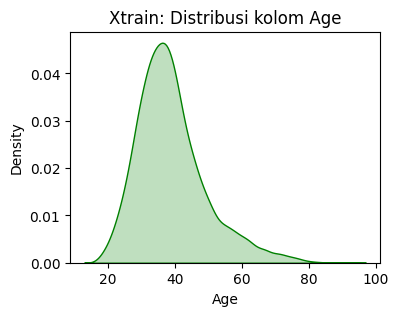

In [129]:
# distribusi kolom Age pada data Xtrain sebelum dilakukan transformasi logaritma
plt.figure(figsize=(4, 3))
sns.kdeplot(Xtrain['Age'], shade=True, color='green')
plt.title('Xtrain: Distribusi kolom Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

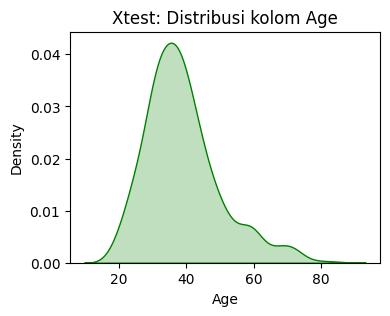

In [130]:
# distribusi kolom Age pada data Xtest sebelum dilakukan transformasi logaritma
plt.figure(figsize=(4, 3))
sns.kdeplot(Xtest['Age'], shade=True, color='green')
plt.title('Xtest: Distribusi kolom Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [131]:
# transformasi logaritma kolom Age pada data Xtrain dan XTest
Xtrain['Age'] = (Xtrain['Age']).apply(np.log)
Xtest['Age'] = (Xtest['Age']).apply(np.log)

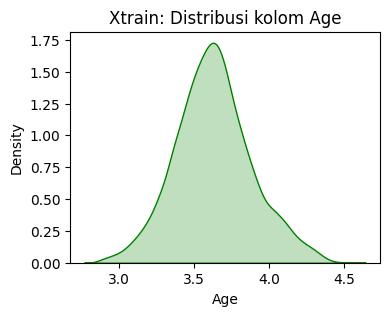

In [132]:
# distribusi kolom Age pada data XTrain setelah dilakukan transformasi logaritma
plt.figure(figsize=(4, 3))
sns.kdeplot(Xtrain['Age'], shade=True, color='green')
plt.title('Xtrain: Distribusi kolom Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

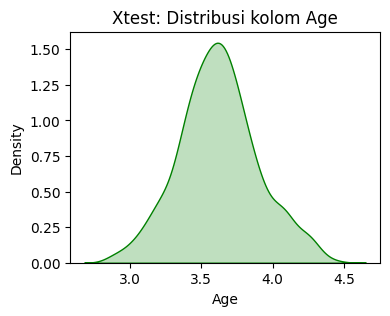

In [133]:
# distribusi kolom Age pada data Xtest setelah dilakukan transformasi logaritma
plt.figure(figsize=(4, 3))
sns.kdeplot(Xtest['Age'], shade=True, color='green')
plt.title('Xtest: Distribusi kolom Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## **Feature Transformation**

In [134]:
import math
numerik = ['CreditScore', 'Balance', 'EstimatedSalary']
features = numerik
num_plots = len(features)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

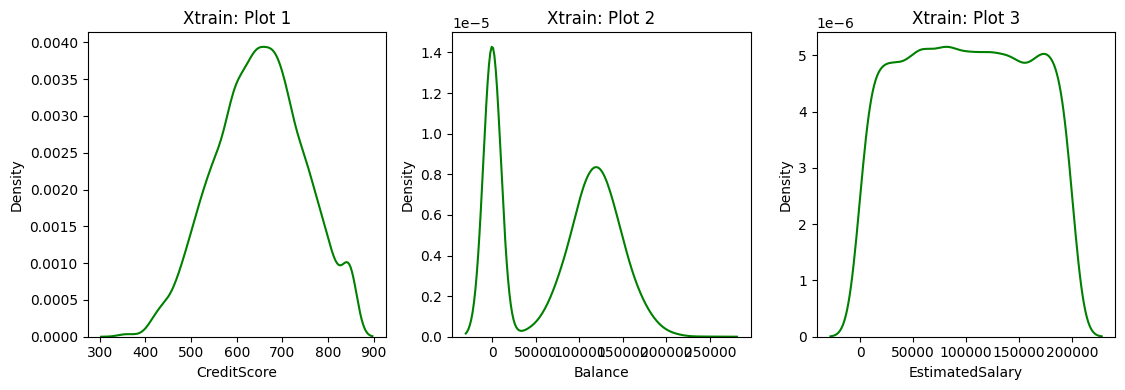

In [135]:
plt.figure(figsize=(15, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xtrain[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xtrain: Plot {i+1}')
plt.tight_layout()
plt.show()

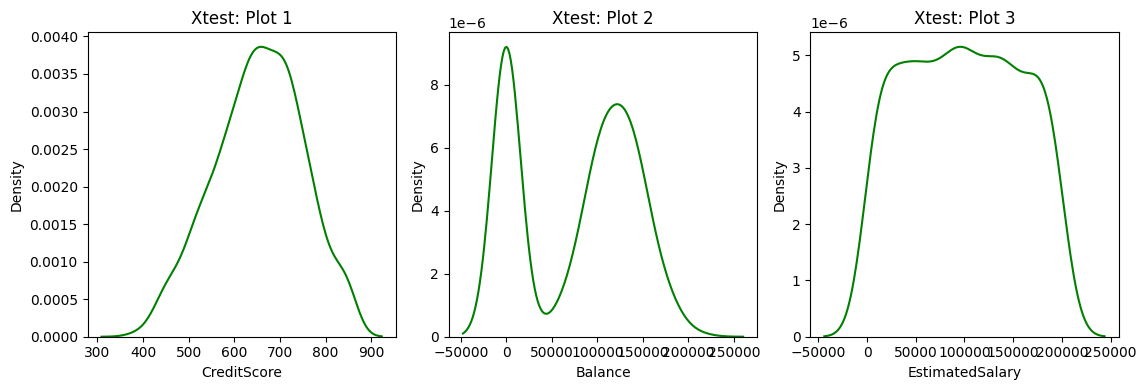

In [136]:
plt.figure(figsize=(15, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xtest[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xtest: Plot {i+1}')
plt.tight_layout()
plt.show()

In [137]:
# fitur transformasi kolom creditscore, balance, dan estimatedsalary pada data xtrain dan xtest
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

for col in numerik:
  Xtrain[[col]] = ms.fit_transform(Xtrain[[col]])
  Xtest[[col]] = ms.transform(Xtest[[col]])

In [138]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

for col in numerik:
  scaler = ms.fit(Xtrain[[col]])

  Xtrain[[col]] = ms.transform(Xtrain[[col]])
  Xtest[[col]] = ms.transform(Xtest[[col]])

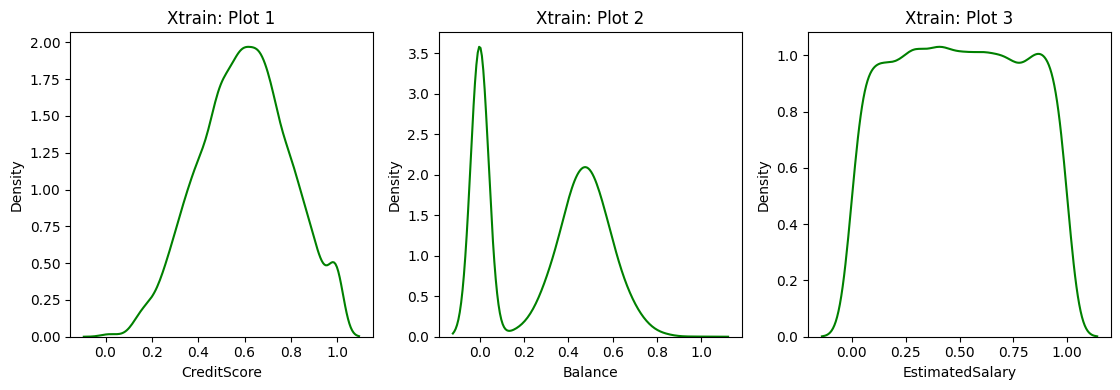

In [139]:
# distribusi kolom creditscore, balance, dan estimatedsalary pada data Xtrain setelah dilakukan transformasi fitur
plt.figure(figsize=(15, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xtrain[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xtrain: Plot {i+1}')
plt.tight_layout()
plt.show()

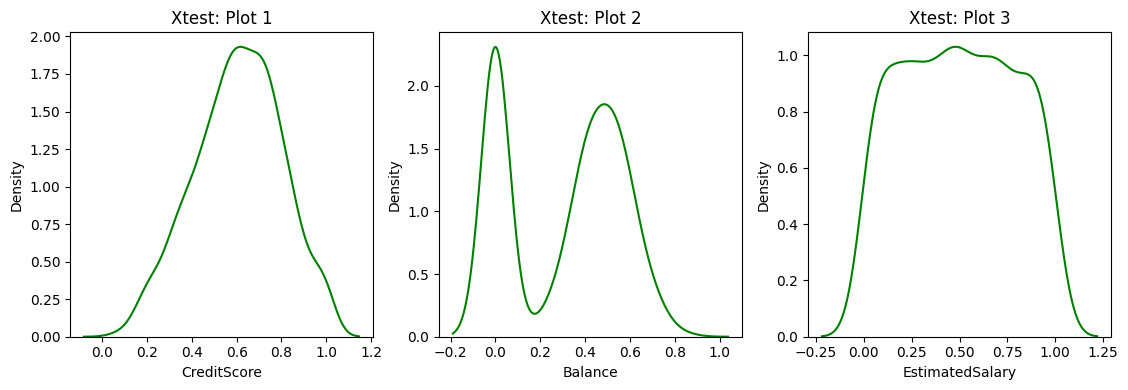

In [140]:
# distribusi kolom creditscore, balance, dan estimatedsalary pada data Xtest setelah dilakukan transformasi fitur
plt.figure(figsize=(15, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xtest[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xtest: Plot {i+1}')
plt.tight_layout()
plt.show()

In [141]:
Xtrain.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1200,0.844,3.401197,6,0.397712,2,0,0.986226,0,1,0,0,1
1181,0.602,3.178054,7,0.160323,1,1,0.891734,0,1,0,1,0
4861,0.626,3.091042,9,0.000000,1,0,0.145635,0,0,1,1,0
9282,0.538,3.526361,1,0.000000,1,0,0.699606,0,0,1,0,1
331,0.634,3.688879,1,0.583911,1,0,0.095766,0,0,1,1,0


In [142]:
Xtest.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8163,0.836,3.871201,3,0.489568,1,1,0.122623,0,1,0,0,1
4588,0.144,3.713572,6,0.610761,1,0,0.058263,1,0,0,0,1
9586,0.392,2.995732,6,0.000000,1,1,0.102496,1,0,0,1,0
118,0.348,3.433987,8,0.429731,1,0,0.998664,0,1,0,1,0
2109,0.492,3.713572,5,0.000000,2,1,0.705279,0,0,1,0,1


In [143]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 1200 to 4834
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9000 non-null   float64
 1   Age                9000 non-null   float64
 2   Tenure             9000 non-null   int64  
 3   Balance            9000 non-null   float64
 4   NumOfProducts      9000 non-null   int64  
 5   IsActiveMember     9000 non-null   int64  
 6   EstimatedSalary    9000 non-null   float64
 7   Geography_France   9000 non-null   uint8  
 8   Geography_Germany  9000 non-null   uint8  
 9   Geography_Spain    9000 non-null   uint8  
 10  Gender_Female      9000 non-null   uint8  
 11  Gender_Male        9000 non-null   uint8  
dtypes: float64(4), int64(3), uint8(5)
memory usage: 606.4 KB


In [144]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 8163 to 8501
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1000 non-null   float64
 1   Age                1000 non-null   float64
 2   Tenure             1000 non-null   int64  
 3   Balance            1000 non-null   float64
 4   NumOfProducts      1000 non-null   int64  
 5   IsActiveMember     1000 non-null   int64  
 6   EstimatedSalary    1000 non-null   float64
 7   Geography_France   1000 non-null   uint8  
 8   Geography_Germany  1000 non-null   uint8  
 9   Geography_Spain    1000 non-null   uint8  
 10  Gender_Female      1000 non-null   uint8  
 11  Gender_Male        1000 non-null   uint8  
dtypes: float64(4), int64(3), uint8(5)
memory usage: 67.4 KB


## **Imbalanced Data**

In [145]:
ytrain.value_counts()

0    7167
1    1833
Name: Exited, dtype: int64

In [146]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=123)
Xtrain_over, ytrain_over = smote.fit_resample(Xtrain, ytrain)

print('SMOTE')
print(pd.Series(ytrain_over).value_counts())

SMOTE
0    7167
1    7167
Name: Exited, dtype: int64


Dilakukan oversampling karena data yang dimiliki berjumlah sedikit

In [147]:
ytest.value_counts()

0    796
1    204
Name: Exited, dtype: int64

## **Feature Engineering**

### **Feature Selection**

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   IsActiveMember     10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   Geography_France   10000 non-null  uint8  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Female      10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 674.0 KB


<Axes: >

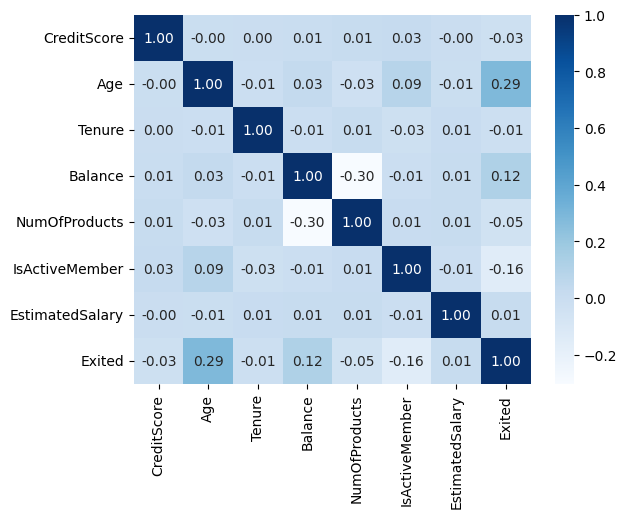

In [149]:
# Membuat heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')

- Tidak ada multikolinearitas antar fitur (tidak ada fitur
redundan)
- Berdasarkan linear corelation, fitur `HasCrCard`, `Tenure`, `EstimatedSalary` memiliki skor paling rendah terhadap fitur target
- Diperlukan analisis fitur lebih lanjut karena heatmap corr hanya melihat hubungan linear corr. Sedangkan, fitur yang ada merupakan campuran numerik dan kategorik

### **Mutual Information Classification**

In [150]:
from sklearn.feature_selection import mutual_info_classif


X = df.drop(columns=['Exited'])
y= df['Exited']

mi_scores = mutual_info_classif(X, y,random_state=123)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

NumOfProducts        0.071122
Age                  0.066554
IsActiveMember       0.017493
Geography_Germany    0.013773
Balance              0.008551
Geography_France     0.004503
EstimatedSalary      0.002704
CreditScore          0.002301
Gender_Male          0.001974
Gender_Female        0.001872
Tenure               0.001230
Geography_Spain      0.000000
Name: MI Scores, dtype: float64


- Terdapat 7 fitur paling berpengaruh yaitu `log_age`, `NumOfProducts`, `Segment Age`, `Geography_Germany`, `IsActiveMember`, `Norm_Balance`, `Gender_Male`
- Fitur dengan nilai mutual information paling rendah adalah `HasCrCard`
- Fitur yang memiliki score paling rendah dapat dipertimbangkan untuk dihilangkan dari pemodelan

### **Chi_square Test**

In [151]:
from sklearn.feature_selection import chi2

X = df.drop(columns=['Exited'])
y= df['Exited']

chi2_stats, p_values = chi2(X, y)
chi2_stats = pd.Series(chi2_stats, name="Chi2 Scores", index=X.columns)
chi2_stats = chi2_stats.sort_values(ascending=False)
print(chi2_stats)

Balance              7.151303e+06
EstimatedSalary      4.835088e+04
Age                  2.300417e+03
Geography_Germany    2.254644e+02
IsActiveMember       1.181994e+02
CreditScore          1.054035e+02
Gender_Female        6.190917e+01
Geography_France     5.492371e+01
Gender_Male          5.153993e+01
Geography_Spain      2.086721e+01
NumOfProducts        5.055394e+00
Tenure               3.270538e+00
Name: Chi2 Scores, dtype: float64


In [152]:
p_values = pd.Series(p_values, name="p_value", index=X.columns)
p_values = p_values.sort_values(ascending=False)
print(p_values)

Tenure               7.053449e-02
NumOfProducts        2.454940e-02
Geography_Spain      4.922505e-06
Gender_Male          7.015575e-13
Geography_France     1.253006e-13
Gender_Female        3.596700e-15
CreditScore          9.963536e-25
IsActiveMember       1.568036e-27
Geography_Germany    5.814572e-51
Age                  0.000000e+00
Balance              0.000000e+00
EstimatedSalary      0.000000e+00
Name: p_value, dtype: float64


- Terdapat 7 fitur paling berpengaruh yaitu `Geography_Germany`, `Segment Age`, `IsActiveMember`, `Segment Balance`, `Gender_Female`, `Geography_France`, `Gender_Male`
- Fitur dengan nilai mutual information paling rendah adalah `HasCrCard`
- Fitur yang memiliki score paling rendah dapat dipertimbangkan untuk dihilangkan dari pemodelan

### **ANOVA**

In [153]:
from sklearn.feature_selection import f_classif

X = df.drop(columns=['Exited'])
y= df['Exited']

f_statistic, p_values = f_classif(X, y)
f_statistic = pd.Series(f_statistic, name="f Scores", index=X.columns)
f_statistic = f_statistic.sort_values(ascending=False)
print(f_statistic)

Age                  886.063275
Geography_Germany    310.258384
IsActiveMember       249.800794
Balance              142.473832
Gender_Female        114.727989
Gender_Male          114.727989
Geography_France     111.360517
Geography_Spain       27.809468
NumOfProducts         22.915223
CreditScore            7.344522
Tenure                 1.960164
EstimatedSalary        1.463262
Name: f Scores, dtype: float64


In [154]:
p_values = pd.Series(p_values, name="p_value", index=X.columns)
p_values = p_values.sort_values(ascending=False)
print(p_values)

EstimatedSalary       2.264404e-01
Tenure                1.615268e-01
CreditScore           6.738214e-03
NumOfProducts         1.717333e-06
Geography_Spain       1.366655e-07
Geography_France      6.748446e-26
Gender_Male           1.258505e-26
Gender_Female         1.258505e-26
Balance               1.275563e-32
IsActiveMember        1.348269e-55
Geography_Germany     2.059537e-68
Age                  1.239931e-186
Name: p_value, dtype: float64


- Terdapat 7 fitur paling berpengaruh yaitu `log_age`, `Segment Age`, `Geography_Germany`, `IsActiveMember`, `Norm_Balance`, `Segment Balance`, `Gender_Female`
- Fitur dengan nilai mutual information paling rendah adalah `HasCrCard`
- Fitur yang memiliki score paling rendah dapat dipertimbangkan untuk dihilangkan dari pemodelan

### **Feature Importance**

In [155]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
lr = LogisticRegression()

# Fit model
X = df.drop(columns=['Exited'])
Y = df['Exited']
lr.fit(X, Y)

# Mendapatkan koefisien dan nama kolom
coef_list = lr.coef_[0]
col_names = X.columns

# Menggabungkan nama kolom dan koefisien
coef_names = list(zip(col_names, coef_list))

# Mengurutkan berdasarkan nilai koefisien
coef_names_sorted = sorted(coef_names, key=lambda x: abs(x[1]), reverse=True)

# Menampilkan koefisien model
for coef_name in coef_names_sorted:
    print(f"{coef_name[0]}: {coef_name[1]}")

Age: 0.04380560351974026
CreditScore: -0.00503524933136823
Tenure: -0.0015909721882907241
IsActiveMember: -0.0014176240568898658
Gender_Male: -0.0010386800611553893
Geography_Germany: 0.0009484133604965154
Gender_Female: 0.0008464146909834104
Geography_France: -0.0008062500584273772
NumOfProducts: -0.0004459470605139449
Geography_Spain: -0.000334428672243049
Balance: 3.621614099722113e-06
EstimatedSalary: -1.3615994674904917e-06




Fitur yang dibuang:
- `RowNumber`, `CustomerId`, `Surname` = fitur ini dibuang di awal karena tidak digunakan dalam pembuatan model ML
- `Geography`, `Gender` = kolom ini di drop karena sudah dilakukan one hot encoding
- `Age` = kolom ini di drop karena sudah dilakukan transformasi logaritma dan dibuat kolom baru
- `CreditScore`, `Balance`, `EstimatedSalary` = kolom ini di drop karena dilakukan fiture transformasi dan dibuat kolom baru

In [156]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [157]:
Xtrain.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1200,0.844,3.401197,6,0.397712,2,0,0.986226,0,1,0,0,1
1181,0.602,3.178054,7,0.160323,1,1,0.891734,0,1,0,1,0
4861,0.626,3.091042,9,0.000000,1,0,0.145635,0,0,1,1,0
9282,0.538,3.526361,1,0.000000,1,0,0.699606,0,0,1,0,1
331,0.634,3.688879,1,0.583911,1,0,0.095766,0,0,1,1,0


In [158]:
Xtest.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8163,0.836,3.871201,3,0.489568,1,1,0.122623,0,1,0,0,1
4588,0.144,3.713572,6,0.610761,1,0,0.058263,1,0,0,0,1
9586,0.392,2.995732,6,0.000000,1,1,0.102496,1,0,0,1,0
118,0.348,3.433987,8,0.429731,1,0,0.998664,0,1,0,1,0
2109,0.492,3.713572,5,0.000000,2,1,0.705279,0,0,1,0,1


# **4. Modeling**

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   IsActiveMember     10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   Geography_France   10000 non-null  uint8  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Female      10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 674.0 KB


**Helper Function**

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline
import time

def eval_classification(model, smote=True):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)

    model1 = Pipeline([
        ('sampling', SMOTE(sampling_strategy=1, random_state=123)),
        ('classification', model)
    ])

    print("Accuracy (Train): %.2f" % accuracy_score(ytrain, y_pred_train))
    print("Accuracy (Test): %.2f" % accuracy_score(ytest, y_pred))

    print("Precision (Train): %.2f" % precision_score(ytrain, y_pred_train))
    print("Precision (Test): %.2f" % precision_score(ytest, y_pred))

    print("Recall (Train): %.2f" % recall_score(ytrain, y_pred_train))
    print("Recall (Test): %.2f" % recall_score(ytest, y_pred))

    print("F1-Score (Test): %.2f" % f1_score(ytest, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

    if smote==True:
      cv = RepeatedStratifiedKFold(random_state=123, n_repeats = 3)
      score = cross_validate(model1, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc', return_train_score=True)
      print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
      print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe(pipedict, hyperdict, scoring='recall', display=True):
    fitted_models={}
    for name, pipeline in pipedict.items():
        # membangun grid search
        model = GridSearchCV(estimator= pipeline,
                             param_grid= hyperdict[name],
                             scoring= scoring,
                             cv= 5, verbose= 2, n_jobs= -1,
                             return_train_score = True)

        # fit menggunakan grid search
        start = time.time()
        model.fit(Xtrain, ytrain)
        end = time.time()

        # menambahkan model
        fitted_models[name]=model
        if display:
            print(f'The {name} model has been fitted.') # print ketika model telah fit
            print('Total Fit Time: %.3fs' % (end-start)) # print fit time
            print('Best params:\n', model.best_params_,'\n') # print parameter terbaik

    return fitted_models

def confusion(model):
    y_pred_proba = model.predict_proba(Xtest)
    y_predict = model.predict(Xtest)
    print('Accuracy: %.2f%%' % (accuracy_score(ytest, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(ytest, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(ytest, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(ytest, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(ytest, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(ytest, y_predict)

    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

**Fit Model**

Metrics evaluasi akan berfokus pada nilai *Recall* untuk mengurangi False Negative rate sebanyak-banyaknya.

**Logistic Regression**

In [161]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain_over, ytrain_over)

eval_classification(logreg)

Accuracy (Train): 0.71
Accuracy (Test): 0.70
Precision (Train): 0.38
Precision (Test): 0.37
Recall (Train): 0.70
Recall (Test): 0.64
F1-Score (Test): 0.47
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7747422221635383
roc_auc (crossval test): 0.772947671879752


**Decision Tree**

In [162]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Xtrain_over, ytrain_over)

eval_classification(dt)

Accuracy (Train): 1.00
Accuracy (Test): 0.76
Precision (Train): 1.00
Precision (Test): 0.43
Recall (Train): 1.00
Recall (Test): 0.52
F1-Score (Test): 0.47
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.67
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6898755845700666


**AdaBoost**

In [163]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(Xtrain_over, ytrain_over)

eval_classification(ada)

Accuracy (Train): 0.79
Accuracy (Test): 0.82
Precision (Train): 0.50
Precision (Test): 0.55
Recall (Train): 0.71
Recall (Test): 0.75
F1-Score (Test): 0.63
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.86
roc_auc (crossval train): 0.8500197416870571
roc_auc (crossval test): 0.8410014169595527


**KNN**

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain_over, ytrain_over)

eval_classification(knn)

Accuracy (Train): 0.84
Accuracy (Test): 0.74
Precision (Train): 0.57
Precision (Test): 0.41
Recall (Train): 0.91
Recall (Test): 0.64
F1-Score (Test): 0.50
roc_auc (train-proba): 0.95
roc_auc (test-proba): 0.76
roc_auc (crossval train): 0.9537505152374272
roc_auc (crossval test): 0.7529107938859337


**Random Forest**

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 123)
rf.fit(Xtrain_over, ytrain_over)

eval_classification(rf)

Accuracy (Train): 1.00
Accuracy (Test): 0.84
Precision (Train): 1.00
Precision (Test): 0.60
Recall (Train): 1.00
Recall (Test): 0.62
F1-Score (Test): 0.61
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.85
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.84572811256796


**XGBoost**

In [166]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(Xtrain_over, ytrain_over)

eval_classification(xg)

Accuracy (Train): 0.94
Accuracy (Test): 0.85
Precision (Train): 0.85
Precision (Test): 0.65
Recall (Train): 0.84
Recall (Test): 0.59
F1-Score (Test): 0.62
roc_auc (train-proba): 0.97
roc_auc (test-proba): 0.84
roc_auc (crossval train): 0.9813094114806004
roc_auc (crossval test): 0.8429895349195355


Berdasarkan nilai cross validation dapat dilihat bahwa beberapa model masih overfitting sehingga akan dilakukan Hyperparameter Tuning.

**Hyperparameter Tuning**

In [167]:
# membuat alur untuk setiap classifiers
pipelines = {'logisticregression': Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=123)),
                                             ('clf', LogisticRegression())]),
             'decisiontree'      : Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=123)),
                                             ('clf', DecisionTreeClassifier())]),
             'adaboost'          : Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=123)),
                                             ('clf', AdaBoostClassifier())]),
             'knn'               : Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=123)),
                                             ('clf', KNeighborsClassifier())]),
             'randomforest'      : Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=123)),
                                             ('clf', RandomForestClassifier(random_state = 123))]),
             'xgboost'           : Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=123)),
                                             ('clf', XGBClassifier(nthread=6, tree_method='hist',  predictor='cpu_predictor'))])}

# menentukan Hyperparameters untuk setiap pipeline
hyperparameters_lr = {'clf__C': [0.1, 0.2, 0.3]}

hyperparameters_dt = {'clf__max_depth'        : [3, 5, 7], # kedalaman maksimum pohon
                      'clf__min_samples_split': [1, 2, 5], # jumlah sampel minimum yang diperlukan untuk memisahkan sebuah node
                      'clf__min_samples_leaf' : [0.5, 1, 2], # jumlah minimum sampel yang diperlukan di setiap leaf node
                      'clf__criterion'        : ['gini','entropy']} # mengukur kualitas pemisahan

hyperparameters_ada = {'clf__learning_rate' : [0.28, 0.30, 0.32], # laju pembelajaran untuk mengontrol setiap estimator
                      'clf__n_estimators'   : [30, 40, 50]} # jumlah estimator dalam ensemble

hyperparameters_knn = {'clf__n_neighbors': [11, 13, 15], # jumlah tetangga
                       'clf__weights'    : ['uniform', 'distance'], # bobot tetangga
                       'clf__leaf_size'  : [0.05, 1, 3], # ukuran leaf dalam poho
                       'clf__algorithm'  : ['auto']} # algoritma untuk menghitung tetangga terdekat

hyperparameters_rf = {'clf__n_estimators'     : [100, 110, 120], # jumlah pohon dalam ensemble
                      'clf__criterion'        : ['entropy', 'gini'], # kriteria untuk membuat pohon
                      'clf__max_features'     : ['auto'], # fitur untuk mencari pemisahan terbaik
                      'clf__min_samples_leaf' : [0.1, 0.2, 0.3]} # jumlah minimum sampel

hyperparameters_xgb = {'clf__eta'             : [0.35, 0.50, 0.75],
                       'clf__max_depth'       : [1, 2, 3], # kedalaman maksimum setiap pohon dalam ensemble
                       'clf__scale_pos_weight': [2, 4, 6]}

# inisiasi hyperparameter
hyperparameters = {'logisticregression':hyperparameters_lr,
                   'decisiontree': hyperparameters_dt,
                   'adaboost': hyperparameters_ada,
                   'knn': hyperparameters_knn,
                   'randomforest':hyperparameters_rf,
                   'xgboost': hyperparameters_xgb}

In [168]:
fitted_models = grid_pipe(pipelines, hyperparameters, scoring='recall')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The logisticregression model has been fitted.
Total Fit Time: 5.982s
Best params:
 {'clf__C': 0.2} 

Fitting 5 folds for each of 54 candidates, totalling 270 fits
The decisiontree model has been fitted.
Total Fit Time: 19.001s
Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The adaboost model has been fitted.
Total Fit Time: 20.805s
Best params:
 {'clf__learning_rate': 0.3, 'clf__n_estimators': 40} 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The knn model has been fitted.
Total Fit Time: 76.975s
Best params:
 {'clf__algorithm': 'auto', 'clf__leaf_size': 1, 'clf__n_neighbors': 13, 'clf__weights': 'uniform'} 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The randomforest model has been fitted.
Total Fit Time: 44.360s
Best params:
 {'clf__criterion': 'entropy', 

**Logistic Regression**

In [169]:
logreg = LogisticRegression(C=0.2)
logreg.fit(Xtrain_over, ytrain_over)

eval_classification(logreg)

Accuracy (Train): 0.71
Accuracy (Test): 0.70
Precision (Train): 0.38
Precision (Test): 0.37
Recall (Train): 0.70
Recall (Test): 0.64
F1-Score (Test): 0.47
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7746691869413166
roc_auc (crossval test): 0.7728708999300781


**Decision Tree**

In [170]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf= 1, min_samples_split= 2)
dt.fit(Xtrain_over, ytrain_over)

eval_classification(dt)

Accuracy (Train): 0.75
Accuracy (Test): 0.74
Precision (Train): 0.43
Precision (Test): 0.42
Recall (Train): 0.81
Recall (Test): 0.77
F1-Score (Test): 0.54
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.84
roc_auc (crossval train): 0.8411915077513044
roc_auc (crossval test): 0.8260616451668285


**Adaboost**

In [171]:
ada = AdaBoostClassifier(learning_rate= 0.30, n_estimators= 40)
ada.fit(Xtrain_over, ytrain_over)
eval_classification(ada)

Accuracy (Train): 0.78
Accuracy (Test): 0.80
Precision (Train): 0.48
Precision (Test): 0.50
Recall (Train): 0.73
Recall (Test): 0.76
F1-Score (Test): 0.61
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.85
roc_auc (crossval train): 0.846321942769701
roc_auc (crossval test): 0.8426093982894522


**KNN**

In [172]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, n_neighbors = 13, weights = 'uniform')
knn.fit(Xtrain_over, ytrain_over)

eval_classification(knn)

Accuracy (Train): 0.79
Accuracy (Test): 0.74
Precision (Train): 0.49
Precision (Test): 0.41
Recall (Train): 0.82
Recall (Test): 0.64
F1-Score (Test): 0.50
roc_auc (train-proba): 0.89
roc_auc (test-proba): 0.77
roc_auc (crossval train): 0.889969707179421
roc_auc (crossval test): 0.7735745625774666


**Random Forest**

In [173]:
rf = RandomForestClassifier(criterion='entropy', max_features='auto', min_samples_leaf=0.2, n_estimators = 110, random_state=123)
rf.fit(Xtrain_over, ytrain_over)

eval_classification(rf)

Accuracy (Train): 0.73
Accuracy (Test): 0.73
Precision (Train): 0.41
Precision (Test): 0.41
Recall (Train): 0.70
Recall (Test): 0.65
F1-Score (Test): 0.50
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.77
roc_auc (crossval train): 0.7834127361247668
roc_auc (crossval test): 0.7813794950043089


**XGBoost**

In [174]:
xg = XGBClassifier(eta = 0.35, max_depth = 1, scale_pos_weight = 2, nthread=6, tree_method='hist',  predictor='cpu_predictor')
xg.fit(Xtrain_over, ytrain_over)

eval_classification(xg)

Accuracy (Train): 0.69
Accuracy (Test): 0.70
Precision (Train): 0.38
Precision (Test): 0.39
Recall (Train): 0.86
Recall (Test): 0.84
F1-Score (Test): 0.53
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.85
roc_auc (crossval train): 0.8486816914315475
roc_auc (crossval test): 0.842790155876512


- Nilai cross validation sudah jauh lebih baik dan tidak overfitting, sehingga semua model sudah best fit.
- Model yang dipilih adalah Adaboost karena memiliki nilai *accuracy* dan *recall* yang tertinggi dan cukup seimbang.

**Confusion Matrix**

Accuracy: 79.90%
Precision: 50.49%
Recall: 75.98%
F1_Score: 60.67%
ROC_AUC: 85.27%


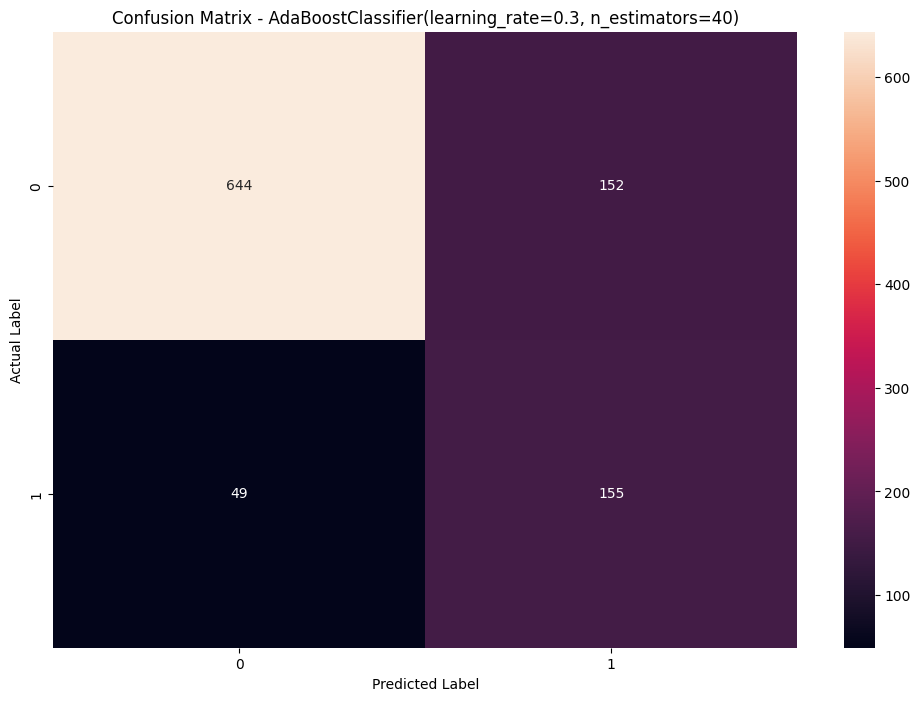

In [175]:
confusion(ada)

Accuracy: 70.00%
Precision: 39.04%
Recall: 83.82%
F1_Score: 53.27%
ROC_AUC: 85.48%


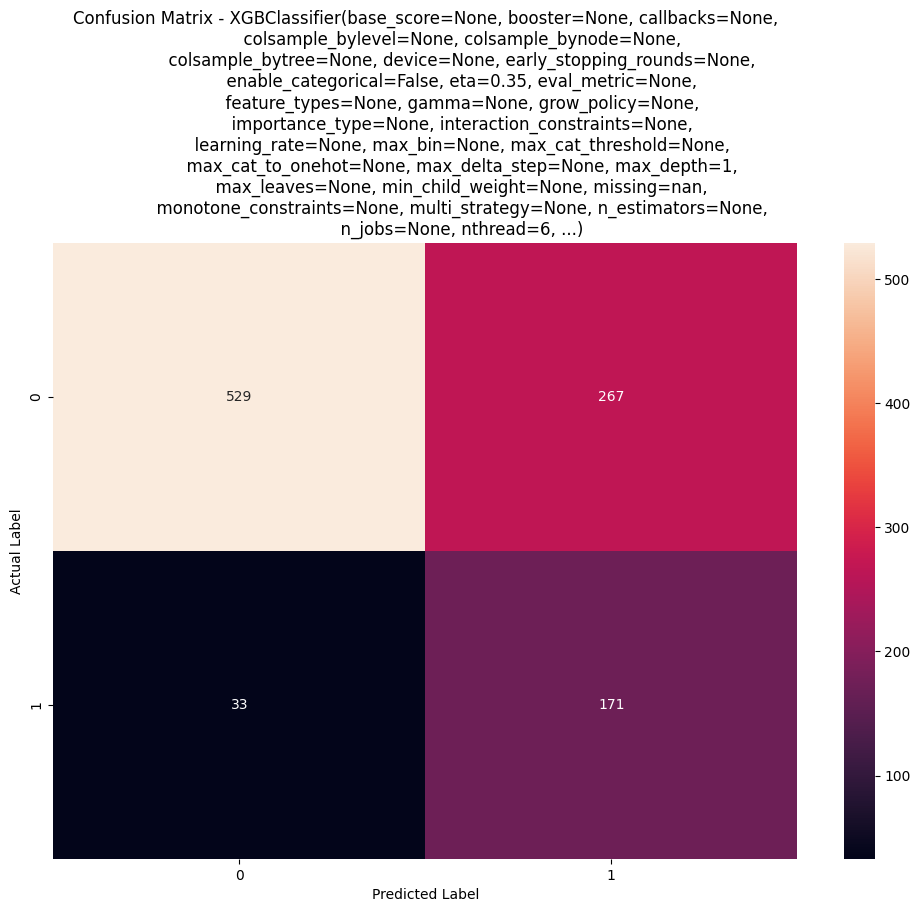

In [176]:
confusion(xg)

**Feature Importance**

Plot permutation importance digunakan untuk mengevaluasi kepentingan relatif dari setiap fitur dalam model prediktif. Metode ini mengukur pengurangan dalam kinerja model ketika nilai fitur diacak secara acak, yang memberikan gambaran tentang seberapa pentingnya fitur tersebut dalam membuat prediksi yang akurat.

Text(0.5, 1.0, 'Permutation Feature Importance')

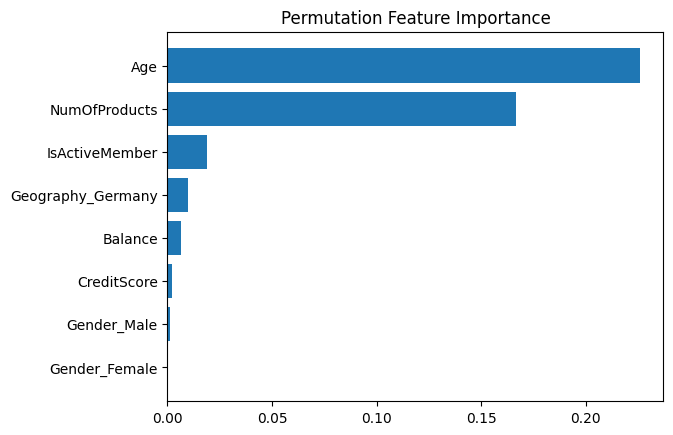

In [177]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(ada, Xtest, ytest, n_repeats = 10, random_state= 123, scoring = 'recall')
sorted_idx = perm_importance.importances_mean.argsort()[-8:]
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(Xtest.columns)[sorted_idx])
plt.title('Permutation Feature Importance')

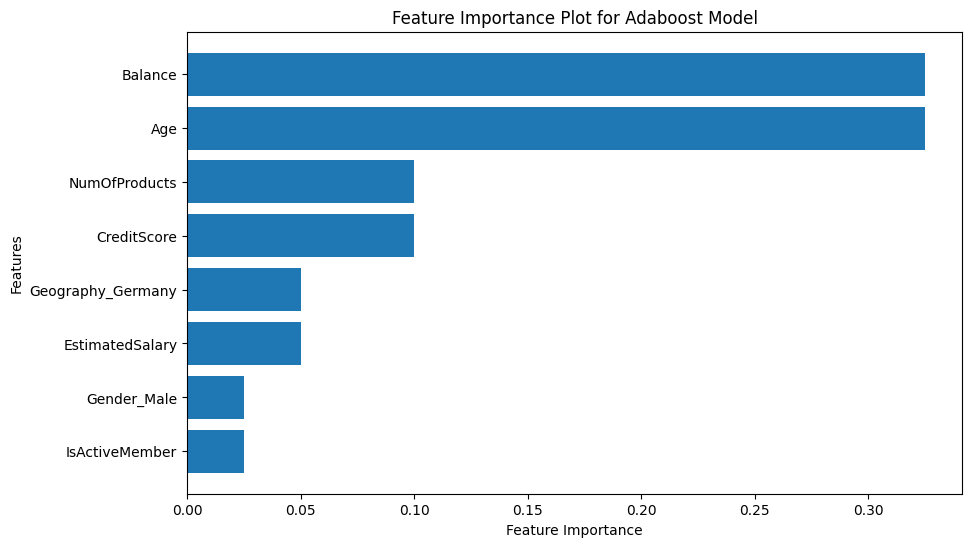

In [178]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=123)
adaboost_clf.fit(Xtrain_over, ytrain_over)

feature_importance = adaboost_clf.feature_importances_

sorted_idx = np.argsort(feature_importance)
sorted_features = Xtrain.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

top_features = sorted_features[-8:]
top_importance = sorted_importance[-8:]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Adaboost Model')
plt.show()

In [180]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.5 MB/s eta 0:00:00


In [181]:
import shap

# Inisialisasi SHAP explainer dengan model AdaBoost dan data pelatihan
explainer = shap.Explainer(ada, Xtrain_over)

# Hitung SHAP values
shap_values = explainer.shap_values(Xtrain_over)

# Visualisasikan SHAP values
shap.summary_plot(shap_values, Xtrain_over, plot_type="bar")

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: AdaBoostClassifier(learning_rate=0.3, n_estimators=40)